<a href="https://colab.research.google.com/github/Mythili134/P.-Mythili/blob/main/DL_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# Define the Recurrent Neural Network
class SimpleRNN:
    def __init__(self, input_size, hidden_size, output_size):
        self.hidden_size = hidden_size

        # Initialize weights
        self.U = np.random.randn(hidden_size, input_size)  # input to hidden
        self.W = np.random.randn(hidden_size, hidden_size)  # hidden to hidden
        self.V = np.random.randn(output_size, hidden_size)  # hidden to output

        # Initialize hidden state
        self.h = np.zeros((hidden_size, 1))

    def forward(self, x):
        self.h = np.tanh(np.dot(self.U, x) + np.dot(self.W, self.h))  # hidden state update
        y = np.dot(self.V, self.h)  # output calculation
        return y, self.h

# Example usage
input_size = 10  # e.g., size of the input vector
hidden_size = 20  # number of hidden units
output_size = 1  # e.g., a binary classification

rnn = SimpleRNN(input_size, hidden_size, output_size)

# Create a random input vector
x = np.random.randn(input_size, 1)

# Forward pass
output, hidden_state = rnn.forward(x)
print("Output:", output)
print("Hidden State:", hidden_state)

Output: [[4.24922829]]
Hidden State: [[ 0.99997907]
 [ 0.9976673 ]
 [ 0.96504293]
 [-0.98080362]
 [-0.59545701]
 [-0.99946665]
 [ 0.89999971]
 [-0.90662503]
 [-0.99701183]
 [-0.89311948]
 [-0.99993807]
 [ 0.47969579]
 [-0.99695738]
 [-0.9998495 ]
 [ 0.99999537]
 [ 0.82620929]
 [-0.58578831]
 [ 0.39201701]
 [ 0.99827127]
 [ 0.86615255]]


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Define a Sequential model
model = Sequential()

# Add a SimpleRNN layer
model.add(SimpleRNN(units=50, input_shape=(None, 10)))  # 50 units, input shape (timesteps, features)

# Add a Dense layer for output
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           3,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,101 (12.11 KB)

 Trainable params: 3,101 (12.11 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the IMDB dataset
max_features = 10000  # Number of words to consider as features
maxlen = 500  # Cut texts after this number of words (among top max_features most common words)

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure uniform input length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
from tensorflow.keras.layers import Embedding

# Define the model
model = Sequential()

# Add an Embedding layer
model.add(Embedding(input_dim=max_features, output_dim=32, input_length=maxlen))

# Add a SimpleRNN layer
model.add(SimpleRNN(units=50))

# Add a Dense layer for output
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 134ms/step - accuracy: 0.5721 - loss: 0.6651 - val_accuracy: 0.7866 - val_loss: 0.4631
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 123ms/step - accuracy: 0.7751 - loss: 0.4685 - val_accuracy: 0.8146 - val_loss: 0.4200
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 122ms/step - accuracy: 0.8495 - loss: 0.3691 - val_accuracy: 0.8174 - val_loss: 0.4287
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 126ms/step - accuracy: 0.9006 - loss: 0.2564 - val_accuracy: 0.8104 - val_loss: 0.4153
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 129ms/step - accuracy: 0.9133 - loss: 0.2250 - val_accuracy: 0.8440 - val_loss: 0.4233
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 124ms/step - accuracy: 0.9234 - loss: 0.1986 - val_accuracy: 0.6866 - val_loss: 0.6000
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 127ms/step - accuracy: 0.8433 - loss: 0.3867 - val_accuracy: 0.7558 - val_loss: 0.5324
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 124ms/step - accuracy: 0.8134 - loss: 0.4039 - val

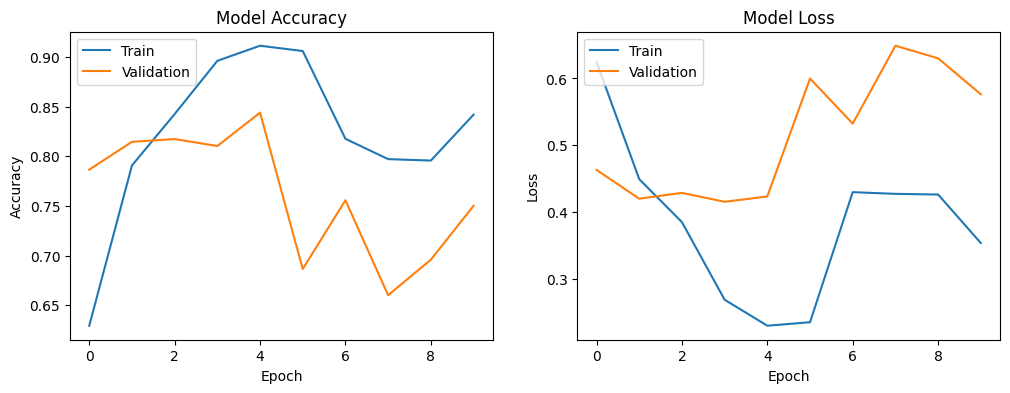

In [5]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
